In [2]:
# pip install pandas numpy matplotlib seaborn nltk textblob wordcloud scikit-learn


In [3]:
# Data Manipulation
import pandas as pd  
import numpy as np   

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns            # For advanced and aesthetically pleasing visualizations

# Text Analysis (Sentiment and NLP)
from nltk.sentiment import SentimentIntensityAnalyzer  
from textblob import TextBlob                          
from wordcloud import WordCloud                       

# Time-Series Analysis
import datetime as dt  # For handling date and time-related operations

# Machine Learning (if needed for advanced analysis later)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.decomposition import LatentDirichletAllocation                   



In [4]:
# loading the data 

stock_data_path = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\raw_analyst_ratings.csv\\raw_analyst_ratings.csv"
stock_df = pd.read_csv(stock_data_path)
stock_df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Displaying basic information about the data-set
print("Dataset Info:")
print(stock_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


In [6]:
# Display the first few rows 
print("First Five rows of the data")
print(stock_df.head(5))


First Five rows of the data
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2

In [7]:
# Droping uneccesary columns 
stock_df_cleaned = stock_df.drop(columns=["Unnamed: 0"])

# Converting the 'date' column to a proper dataetime format 
stock_df_cleaned['date'] = pd.to_datetime(stock_df_cleaned['date'], errors='coerce')

# Checking for invalid dates (those that couldn't be parsed)
invalid_date_rows = stock_df_cleaned[stock_df_cleaned['date'].isna()]
print("\nInvalid Date Row:")
print(invalid_date_rows)

# Removing rows with invalid dates 
stock_df_cleaned = stock_df_cleaned.dropna(subset=['date'])

# Normalize datetime to remove timezone info
stock_df_cleaned['date'] = stock_df_cleaned['date'].dt.tz_localize(None)

# Add new column for headline lengths 
stock_df_cleaned['headline_length'] = stock_df_cleaned['headline'].apply(len)





Invalid Date Row:
                                                  headline  \
10         30 Stocks Moving in Friday's Pre-Market Session   
11       SVB Leerink Maintains Outperform on Agilent Te...   
12       8 Stocks Moving In Thursday's After-Hours Session   
13       Agilent Technologies shares are trading higher...   
14       Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/16092879/3...   
11       https://www.benzinga.com/news/20/05/16092270/s...   
12       https://www.benzinga.com/news/20/05/16089

In [9]:

# Display summary statistics for headline lengths
print("\nSummary Statistics for Headline Lengths:")
print(stock_df_cleaned['headline_length'].describe())

# Count articles by publisher
publisher_counts = stock_df_cleaned['publisher'].value_counts()
print("\nTop Publishers by Article Count:")
print(publisher_counts.head())

# Count articles per day
daily_counts = stock_df_cleaned['date'].dt.date.value_counts().sort_index()
print("\nArticle Counts Per Day (First 5 Days):")
print(daily_counts.head())


Summary Statistics for Headline Lengths:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

Top Publishers by Article Count:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Name: count, dtype: int64

Article Counts Per Day (First 5 Days):
date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
Name: count, dtype: int64


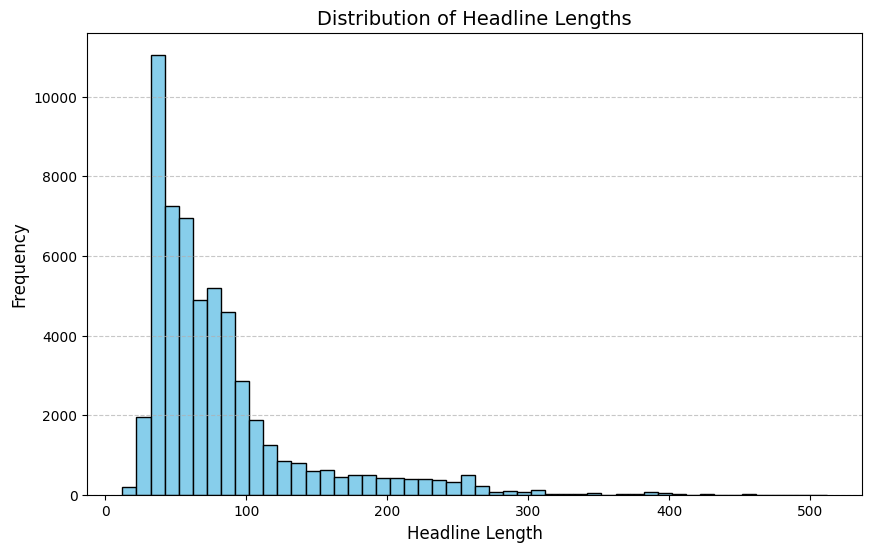

In [10]:
# Visualize headline length distribution
plt.figure(figsize=(10, 6))
plt.hist(stock_df_cleaned['headline_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths', fontsize=14)
plt.xlabel('Headline Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


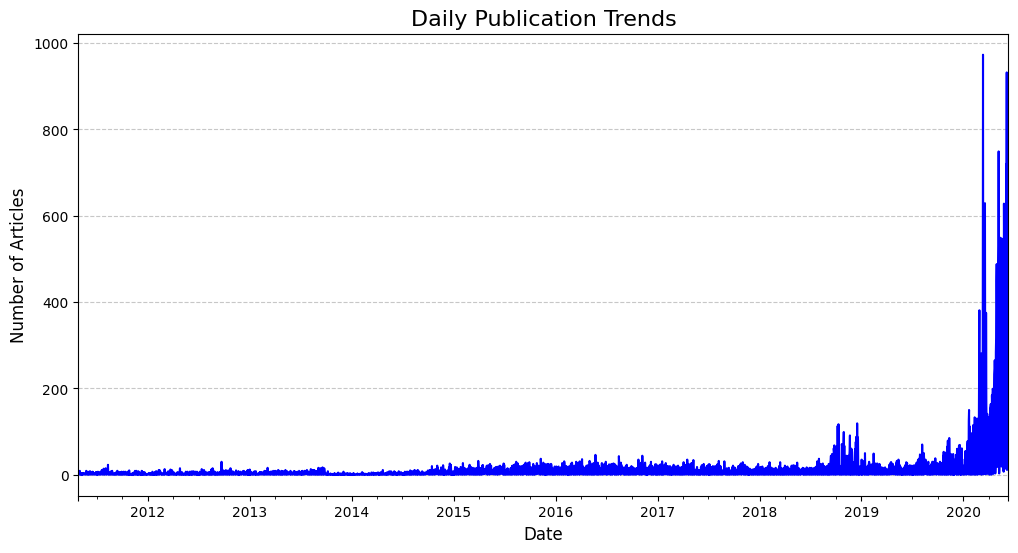

In [21]:
# Time-series for spikes in publication frequency
# Resample data for daily trends
daily_trends = stock_df_cleaned.resample('D', on='date').size()

# Plot the daily publication trends
plt.figure(figsize=(12, 6))
daily_trends.plot(color='blue')
plt.title('Daily Publication Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 2 Sentiment Analysis
# STEP ONE 
from textblob import TextBlob

# FUNCTION TO CALCULATE SENTIMENT POLARITY
def calculate_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

# ADD A SENTIMENT SCORE COLUMN TO THE STOCK_DF_CLEANED DATAFRAME
stock_df_cleaned['sentiment_score'] = stock_df_cleaned['headline'].apply(calculate_sentiment)

# CLASSIFY SENTIMENT AND CREATE A COLUMN ON STOCK_DF_CLEANED DATAFRAME
stock_df_cleaned['sentiment_category'] = pd.cut(
    stock_df_cleaned['sentiment_score'],
    bins=[-1, -0.1, 0.1, 1], # THIS IS A THRESHOLD FOR NEGATIVE, NEUTRAL, AND POSITIVE
    labels = ['negative', 'neutral', 'positive']
)

In [22]:
stock_df_cleaned.head(10)

,headline,url,publisher,date,stock,headline_length,sentiment_score,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A,39,0.00,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A,42,0.00,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A,29,0.00,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A,44,0.00,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A,87,0.00,neutral
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25,A,71,0.00,neutral
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20,A,73,0.00,neutral
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04,A,120,0.25,positive
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59,A,84,0.00,neutral
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17,A,42,0.00,neutral


In [15]:
# DISPLAYING SENTIMENT STATISTICS
print(stock_df_cleaned['sentiment_category'].value_counts())

sentiment_category
neutral     43227
positive     9419
negative     3263
Name: count, dtype: int64


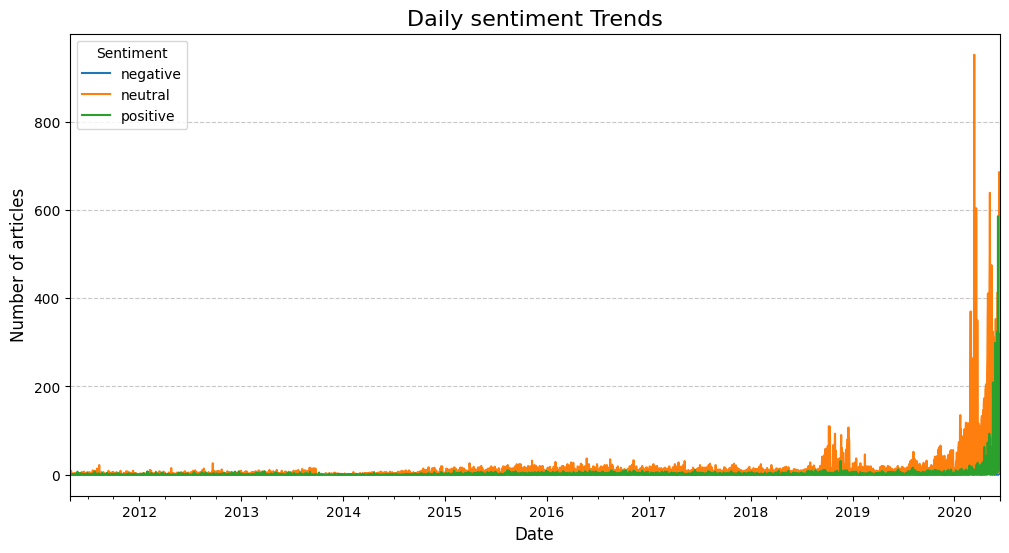

In [18]:
# Visualization of sentiment Trends

# FIRTS WE AGGREGATE SENTIMENT COUNTS OVER TIME 
sentiment_trends = stock_df_cleaned.resample('D', on='date')['sentiment_category'].value_counts().unstack()

# THEN WE PLOT SENTIMENT TRENDS
sentiment_trends.plot(kind='line', figsize=(12,6), stacked = False)
plt.title("Daily sentiment Trends", fontsize=16) 
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of articles", fontsize=12)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
# ANALYZING PUBLISHING TIME AND FOR SPIKES 
print("Top 5 Days with most publications:")
print(daily_trends.nlargest(5))


Top 5 Days with most publications:
date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
dtype: int64


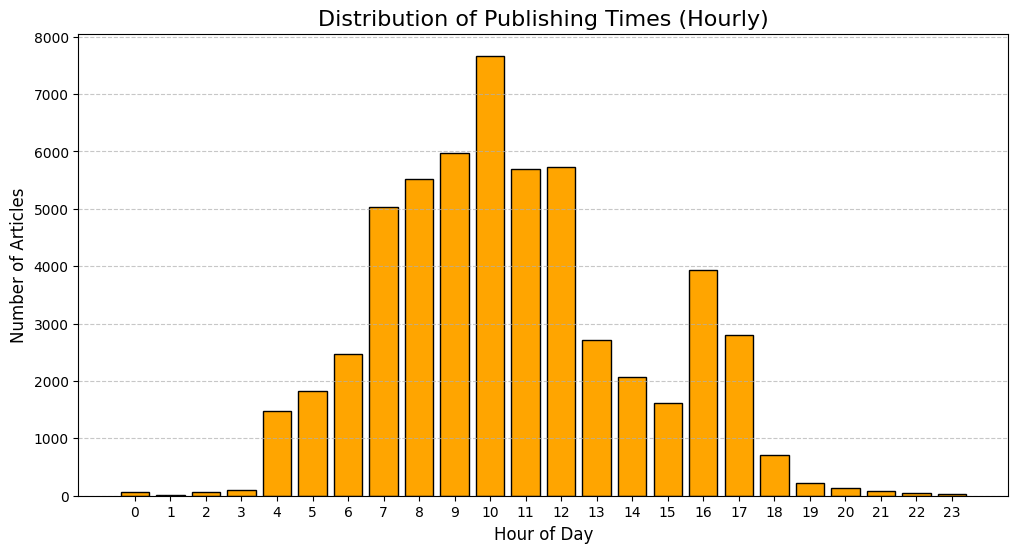

Peak Publishing Times (Top 5 Hours):
hour
10    7669
9     5965
12    5732
11    5701
8     5527
Name: count, dtype: int64


In [30]:
# analysis of publishing times 
# WE FIRTS EXTRACT THE HOUR FROM THE DATE COLUMN

stock_df_cleaned['hour'] = stock_df_cleaned['date'].dt.hour

# COUNT THE ARTICLES BY HOURS

hourly_distribution = stock_df_cleaned['hour'].value_counts().sort_index()

# PLOTTING THE DISTRIBUTION 
plt.figure(figsize=(12,6))
plt.bar(hourly_distribution.index, hourly_distribution.values, 
        color='orange', edgecolor='black')
plt.title('Distribution of Publishing Times (Hourly)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# IDENTIFYING THE PEAK PUBLISHING TIMES 
print("Peak Publishing Times (Top 5 Hours):")
print(hourly_distribution.nlargest(5))


Top Publishers:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Name: count, dtype: int64

Top 5 Publisher Contribution (%):
publisher
Benzinga Newsdesk    26.345402
Lisa Levin           22.162288
ETF Professor         7.791094
Paul Quintaro         7.523175
Benzinga Newsdesk     5.674532
Name: count, dtype: float64

Top 5 Domain
publisher_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


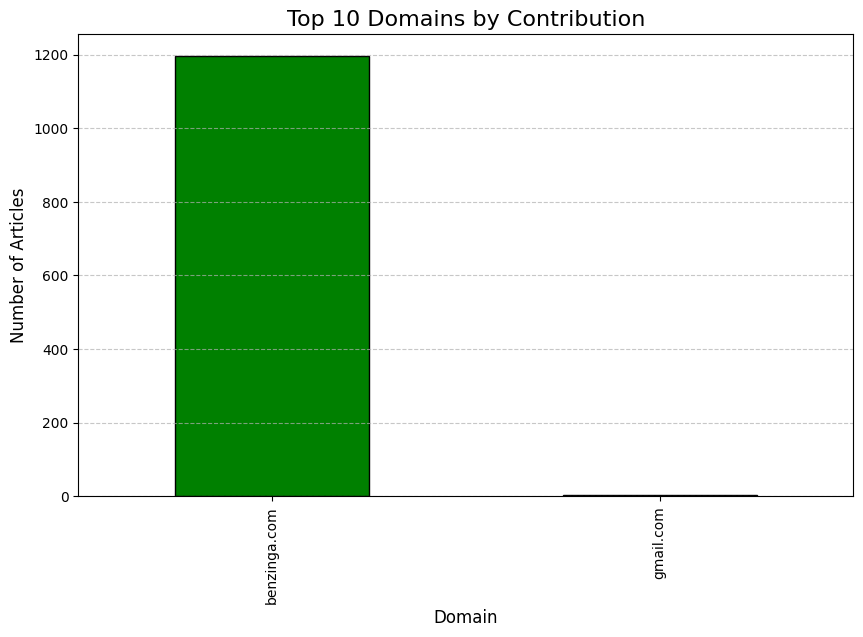

In [40]:
# PUBLISHER ANALYSIS
import re 
# 1 Top Publisher Analysis 

# DISPLAY TOP 5 PUBLISHER
print('Top Publishers:')
print(publisher_counts.head())

# CALCULATING CONTRIBUTION PERCENTAGE 
top_publisher_percent = (publisher_counts / len(stock_df_cleaned)) * 100
print("\nTop 5 Publisher Contribution (%):")
print(top_publisher_percent.head())

# 2 Analyzing Publisher-Specific News Trends



# 3 Unique Domains in publisher Names

# Extract domains from email-like publisher names
def extract_domain(publisher_name):
    match = re.search(r"@([\w.-]+)", publisher_name)
    return match.group(1) if match else None
# applying domain extraction 

stock_df_cleaned['publisher_domain'] = stock_df_cleaned['publisher'].apply(extract_domain)

# Counting each occurrences of each domain
domain_counts = stock_df_cleaned['publisher_domain'].value_counts()


# Display top 5 domains 
print('\nTop 5 Domain')
print(domain_counts.head())

# Visualizng yop daomains 
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Domains by Contribution', fontsize=16)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
